In [30]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [17]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv('fifa22.csv')
df['gender'].value_counts()

M    19239
F      391
Name: gender, dtype: int64

In [7]:
'''drops NaN values in passing column and displaying shape of df'''
df = df.dropna(subset = 'passing')
print(df.shape)

(17450, 20)


In [8]:
'''estimate multiple regression of effect on rank'''
X = df[['passing', 'attacking', 'defending', 'skill']]
y = df[['rank']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
print(X.head())
print(y.head())


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:47:28   Log-Likelihood:                -47856.
No. Observations:               17450   AIC:                         9.572e+04
Df Residuals:                   17445   BIC:                         9.576e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3278      0.203    124.785      0.0

In [9]:
'''train/test set'''
X1 = df[['passing', 'attacking', 'defending', 'skill']]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=123)
X_train.head()

,passing,attacking,defending,skill
17226,52.0,48.0,59.333333,53.2
13548,48.0,55.0,12.666667,54.0
17874,59.0,46.2,58.000000,57.8
19599,47.0,40.6,46.666667,40.0
15629,49.0,51.8,25.666667,49.6


In [10]:
'''linear regression'''
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('training coefficient = ', model.coef_)
print('training intercept = ', model.intercept_)
print('first 5 predicted values = ', y_pred[:5])

training coefficient =  [[-0.02444506  0.61230756  0.17314968  0.00612364]]
training intercept =  [25.16773306]
first 5 predicted values =  [[64.57617047]
 [72.78035994]
 [70.46341746]
 [58.87238631]
 [72.83064615]]


Root Mean Squared Error: 3.7445626399871967


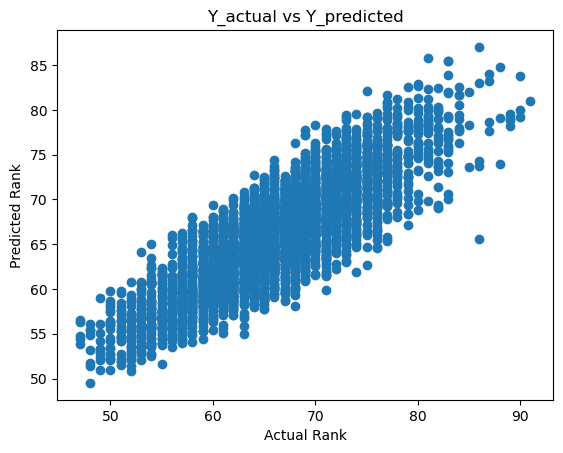

In [11]:
'''plot scatterplot of y actual vs y predicted'''
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.title('Y_actual vs Y_predicted')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


In [12]:
'''Q4 dataframe'''
X2 = df[['shooting', 'passing', 'dribbling', 'defending', 'attacking', 'skill', 'movement', 'power', 'mentality', 'goalkeeping']]
y2 = df[['preferred_foot']]
scaler = StandardScaler()
X2_norm = scaler.fit_transform(X2)
X2_norm_df = pd.DataFrame(X2_norm, columns=X2.columns)
print(X2_norm_df.head(5))
print(X2.head(5))
print(df['preferred_foot'].value_counts())

   shooting   passing  dribbling  defending  attacking     skill  movement  \
0  2.784312  3.296642   3.315358  -1.393049   3.400164  3.548580  2.774640   
1  0.597719  1.229719   1.876719   2.131667   1.593417  0.598209  2.072809   
2  2.854847  1.721843   2.596039  -1.468043   3.421673  2.156896  1.651710   
3  1.232536  0.442320   1.054640   2.262906   0.905132  1.117771 -0.290023   
4  2.784312  2.115543   2.390519  -1.074325   3.421673  2.379565  1.768682   

      power  mentality  goalkeeping  
0  1.944282   2.180614     0.281676  
1  2.066501   1.623697     1.481100  
2  2.702042   1.822596     3.480141  
3  2.506491   2.140834     1.614369  
4  2.799817   2.996099    -0.118132  
   shooting  passing  dribbling  defending  attacking  skill  movement  power  \
0      92.0     91.0       95.0  26.333333       85.8   94.0      90.2   77.8   
1      61.0     70.0       81.0  89.000000       69.0   62.2      84.2   78.8   
2      93.0     75.0       88.0  25.000000       86.0   79.0

In [13]:
'''train/test'''
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=456)
print(X2_train.head(5))

       shooting  passing  dribbling  defending  attacking  skill  movement  \
17219      24.0     43.0       48.0  59.000000       37.2   38.8      58.2   
10931      46.0     61.0       70.0  58.666667       51.6   62.4      72.4   
13667      57.0     59.0       64.0  35.333333       55.0   55.8      66.0   
4492       76.0     78.0       72.0  46.000000       65.4   78.0      71.2   
3980       26.0     60.0       63.0  71.333333       48.8   53.8      62.6   

       power  mentality  goalkeeping  
17219   53.6  42.500000         11.2  
10931   56.6  53.000000         10.0  
13667   58.6  52.500000          7.6  
4492    66.8  62.166667         12.8  
3980    55.8  59.333333         10.8  


In [14]:
'''evaluate k accuracy from 1-30'''
K_values = list(range(1, 31))
accuracy = []
for K in K_values:
    KNN = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(KNN, X2_train, y2_train.values.ravel(), scoring='accuracy')
    accuracy.append(np.mean(scores))

/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns
/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns
/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns
/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns
/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns
/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns
/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns
/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns
/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns
/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns
/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

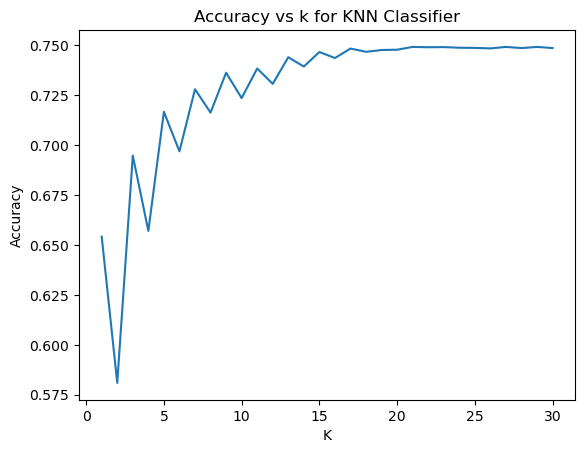

In [18]:
plt.plot(K_values, accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for KNN Classifier')
plt.show()

In [19]:
K = 20
KNN = KNeighborsClassifier(n_neighbors = K)
KNN.fit(X2_train, y2_train.values.ravel())
y2_pred = KNN.predict(X2_test)
print(y2_pred[:5])

['Right' 'Right' 'Right' 'Right' 'Right']


/Users/Andrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Returns


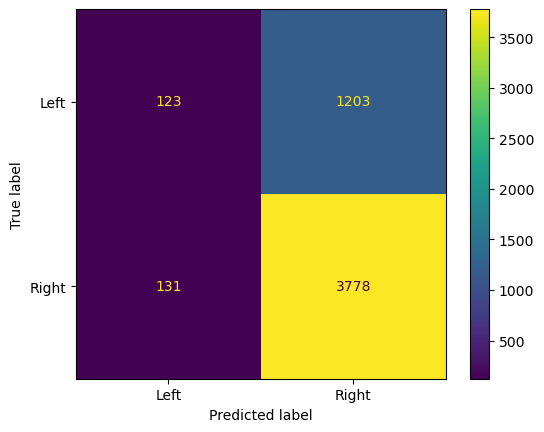

In [20]:
'''confusion matrix'''
confusion_matrix = metrics.confusion_matrix(y2_test, y2_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Left', 'Right'])
cm_display.plot()
plt.show()

In [21]:
'''classification report'''
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

        Left       0.48      0.09      0.16      1326
       Right       0.76      0.97      0.85      3909

    accuracy                           0.75      5235
   macro avg       0.62      0.53      0.50      5235
weighted avg       0.69      0.75      0.67      5235



In [22]:
'''Q5'''
df1 = X2_norm_df.sample(n = 5000, random_state = 2022)
print(df1.head(5))

       shooting   passing  dribbling  defending  attacking     skill  \
291    1.373606  2.115543   1.465680   1.550464   1.830015  1.748668   
501    1.937889  0.934444   1.876719  -0.849343   1.959068  1.377552   
8871   1.020930 -0.246654  -0.795038  -0.736852   1.120221 -0.979033   
12793  0.456648 -0.345079   0.129801  -1.580534   0.173830 -0.552250   
7256  -1.377269 -0.541929  -1.206077   0.763027  -0.600490 -1.591375   

       movement     power  mentality  goalkeeping  
291    0.037498  1.944282   2.180614     0.948023  
501    2.049414  1.870951   1.404908     0.148406  
8871  -1.576714  0.990972   0.310965     0.281676  
12793  1.090245  1.039860  -0.703419    -1.051018  
7256  -0.430389  0.013218  -0.206172     0.814753  


In [24]:
inertia = []
silhouette = []
for k in range (2, 21):
    kmeans = KMeans(n_clusters = k, random_state = 789, n_init=10).fit(df1)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df1, kmeans.labels_))
print("Inertia scores:", inertia)
print("Silhouette scores:", silhouette)

Inertia scores: [30847.126857997697, 25514.42006882391, 22325.851448534882, 20446.24365068818, 18800.168357172755, 17815.28851493193, 16970.31208464592, 16225.337089528179, 15539.294629859276, 14934.889268654111, 14481.297520106662, 14059.12552349397, 13702.000315307085, 13367.061111847268, 13033.397362367057, 12729.13048749465, 12471.523884445007, 12271.496802650789, 12047.002900984]
Silhouette scores: [0.31246180975486454, 0.22178399742848792, 0.22364107701580033, 0.21660999952379578, 0.1919067183409843, 0.17741863261702406, 0.17537814066264307, 0.16864141099793642, 0.1673371367576811, 0.16591722512914436, 0.15883607572574523, 0.1597466974865709, 0.15447041707115897, 0.1549129647307188, 0.15346180596576522, 0.15536317798050395, 0.1513967613907448, 0.14701606881289958, 0.14512396937554353]


In [25]:
kmeans = KMeans(n_clusters = k, random_state = 789, n_init=10).fit(df1)
df1['cluster_label'] = kmeans.labels_
print(df1.head(5))

       shooting   passing  dribbling  defending  attacking     skill  \
291    1.373606  2.115543   1.465680   1.550464   1.830015  1.748668   
501    1.937889  0.934444   1.876719  -0.849343   1.959068  1.377552   
8871   1.020930 -0.246654  -0.795038  -0.736852   1.120221 -0.979033   
12793  0.456648 -0.345079   0.129801  -1.580534   0.173830 -0.552250   
7256  -1.377269 -0.541929  -1.206077   0.763027  -0.600490 -1.591375   

       movement     power  mentality  goalkeeping  cluster_label  
291    0.037498  1.944282   2.180614     0.948023              2  
501    2.049414  1.870951   1.404908     0.148406              9  
8871  -1.576714  0.990972   0.310965     0.281676              0  
12793  1.090245  1.039860  -0.703419    -1.051018             16  
7256  -0.430389  0.013218  -0.206172     0.814753             15  


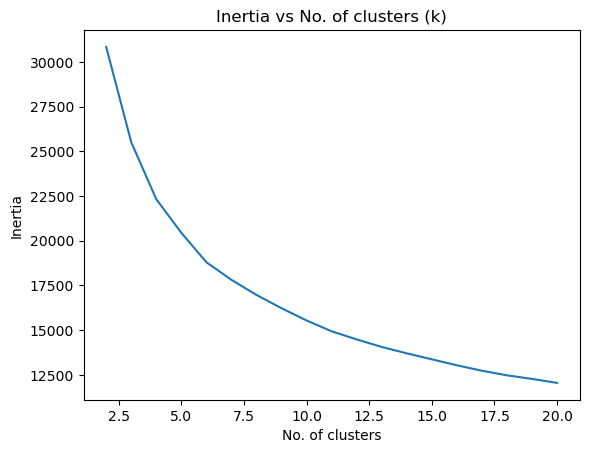

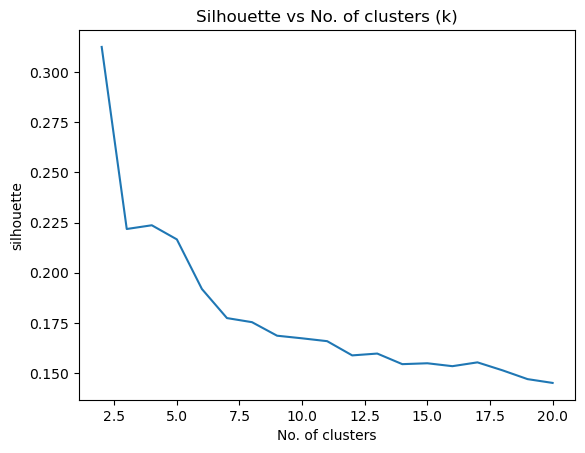

In [26]:
'''plot inertia and silhouette'''
plt.plot(range(2, 21), inertia)
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs No. of clusters (k)')
plt.show()

plt.plot(range(2, 21), silhouette)
plt.xlabel('No. of clusters')
plt.ylabel('silhouette')
plt.title('Silhouette vs No. of clusters (k)')
plt.show()

In [31]:
#get elbow point with kneed
k_values = list(range(2, 21))
knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
elbow = knee_locator.elbow
print("Elbow (optimal k value) in the curve:", elbow)

Elbow (optimal k value) in the curve: 6


Text(0.5, 1.0, 'Attacking Score vs Defending Score (Colored by Cluster)')

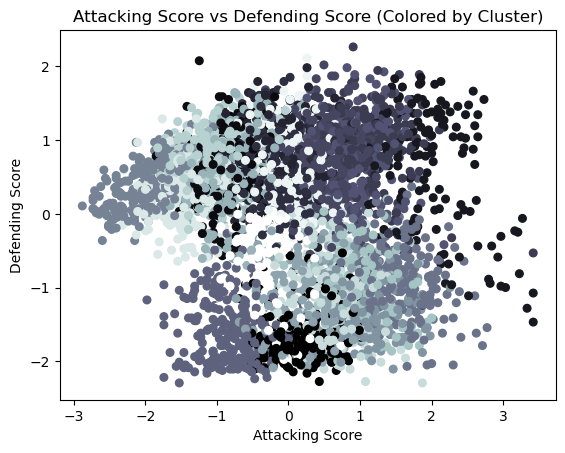

In [42]:
'''plot attacking score vs defending score'''
#df_sample = df.loc[df1.index]
#df_sample['cluster_label'] = kmeans.labels_
scatter = plt.scatter(df1['attacking'], df1['defending'], c=df1['cluster_label'], cmap='bone', s=30)
plt.xlabel('Attacking Score')
plt.ylabel('Defending Score')
plt.title('Attacking Score vs Defending Score (Colored by Cluster)')
